# Your Uni : yc4336
# Your AI Model Share Username: cyn_chen
# Your Full name : Cynthia Chen
# Link to your Public Github repository with Final report  :


# World Happiness Classification Competition

In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

## Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [ ]:
# Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [ ]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')## Load test features to predict on
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')## Load y train (true labels)
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell

X_train.head(100)


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111
...,...,...,...,...,...,...,...,...,...,...,...
83,Libya,1.044,1.303,0.673,0.416,0.133,0.152,Libya,Africa,Northern Africa,1448.000000
84,Albania,0.947,0.848,0.874,0.383,0.178,0.027,Albania,Europe,Southern Europe,9.000000
85,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278,United Kingdom,Europe,Northern Europe,339.000000
86,China,1.029,1.125,0.893,0.521,0.058,0.100,China,Asia,Eastern Asia,37.000000


Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer:  y_train_labels = y_train.idxmax(axis=1) line returns index of first occurrence of maximum over
# requested axis, with 1 or 'columns' for column-wise. The result is an object datatype, with first column
# identical to y_train's(row index) and second column including the name of first maximum column.
# Therefore, y_train stores the labels of training data that are one-hot encoded.
# y_train_label represents the predicted class for each instance in y_train.

##  Add new data

In [ ]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head(100)

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722
...,...,...,...,...,...,...,...,...
95,Netherlands,17035938,8.8,0.924312,81.706,18.116540,11.914070,46325.576580
96,Sweden,9910701,15.0,0.912706,82.347,16.055459,12.273700,46250.793820
97,Hungary,9721559,14.9,0.836211,75.313,15.595180,12.020000,23394.324230
98,Hong Kong,7364883,19.6,0.917157,84.163,15.673290,11.590666,54264.914780


In [ ]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train= pd.merge(X_train, countrydata, left_on='Country or region', right_on='country_name', how='left',suffixes=('', '_remove'))
X_train.drop([i for i in X_train.columns if 'remove' in i],
               axis=1, inplace=True)

X_test= pd.merge(X_test, countrydata, left_on='Country or region', right_on='country_name', how='left',suffixes=('', '_remove'))
X_test.drop([i for i in X_test.columns if 'remove' in i],
               axis=1, inplace=True)


In [ ]:
X_train.head(100)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,Peru,3.216548e+07,22.7,0.739749,74.814,13.38634,9.013470,11294.840330
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,Nicaragua,6.217581e+06,29.6,0.645203,75.212,11.67000,6.544000,4746.699464
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,Greece,1.115977e+07,36.0,0.865873,81.071,17.21752,10.539460,24807.535890
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,Qatar,2.639211e+06,NaN,0.855531,78.323,13.40610,9.764630,129915.600900
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,Uzbekistan,3.191064e+07,14.0,0.700668,69.400,12.16651,12.048045,5748.226043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Libya,1.044,1.303,0.673,0.416,0.133,0.152,Libya,Africa,Northern Africa,1448.000000,Libya,6.374616e+06,33.0,0.716443,71.763,13.40250,7.310000,14303.109530
84,Albania,0.947,0.848,0.874,0.383,0.178,0.027,Albania,Europe,Southern Europe,9.000000,Albania,2.930187e+06,14.3,0.764174,77.968,14.17968,9.646810,10252.469830
85,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278,United Kingdom,Europe,Northern Europe,339.000000,United Kingdom,6.618158e+07,15.0,0.909491,80.849,16.31090,13.284120,37930.827010
86,China,1.029,1.125,0.893,0.521,0.058,0.100,China,Asia,Eastern Asia,37.000000,China,1.409517e+09,3.3,0.737681,75.963,13.53575,7.641840,13345.477460


# EDA

In [ ]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
# Your answer: The data type for each column in the X_train dataframe, which contain mostly 'float64', indicating numercal values with decimal points.
# Others with 'object' indicating categorical variables. Population's data type is 'int64' since population should be integer.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:
round(X_train.isnull().mean()*100,2)

Country or region                 0.00
GDP per capita                    0.00
Social support                    0.00
Healthy life expectancy           0.00
Freedom to make life choices      0.00
Generosity                        0.00
Perceptions of corruption         0.00
name                              0.00
region                            0.00
sub-region                        0.00
Terrorist_attacks                 0.00
country_name                      6.82
population                        6.82
population_below_poverty_line    17.05
hdi                               6.82
life_expectancy                   6.82
expected_years_of_schooling       6.82
mean_years_of_schooling           6.82
gni                               6.82
dtype: float64

Plot the frequency distribution / histogram of some of the numerical features that you think are important

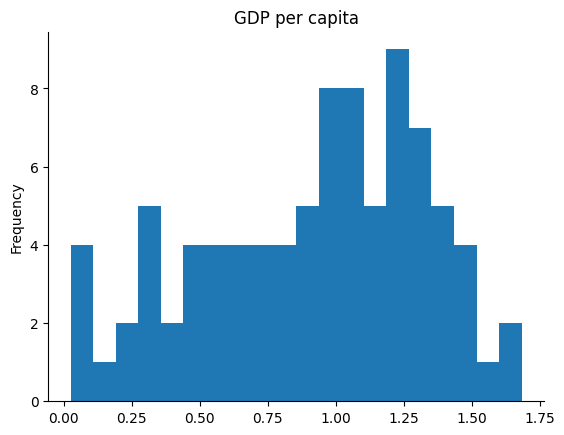

In [ ]:
# Your plotting code here:
from matplotlib import pyplot as plt
X_train['GDP per capita'].plot(kind='hist', bins=20, title='GDP per capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

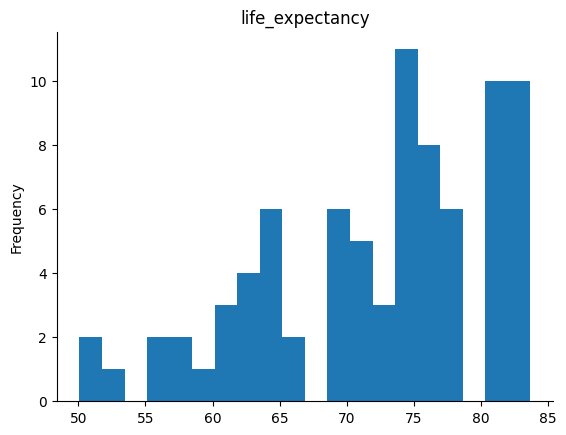

In [ ]:
X_train['life_expectancy'].plot(kind='hist', bins=20, title='life_expectancy')
plt.gca().spines[['top', 'right',]].set_visible(False)

Plot the categorical variables and their distribution

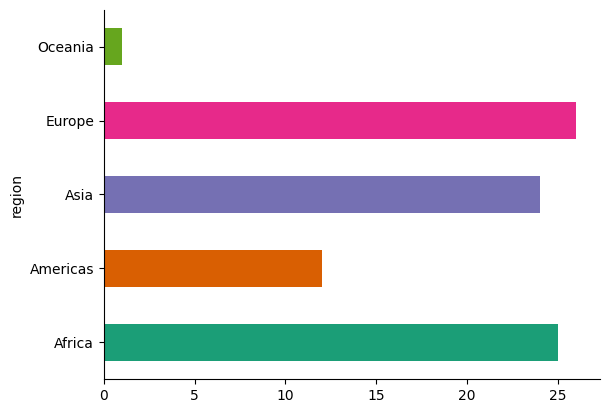

In [ ]:
# Your plotting code here:
import seaborn as sns
X_train.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

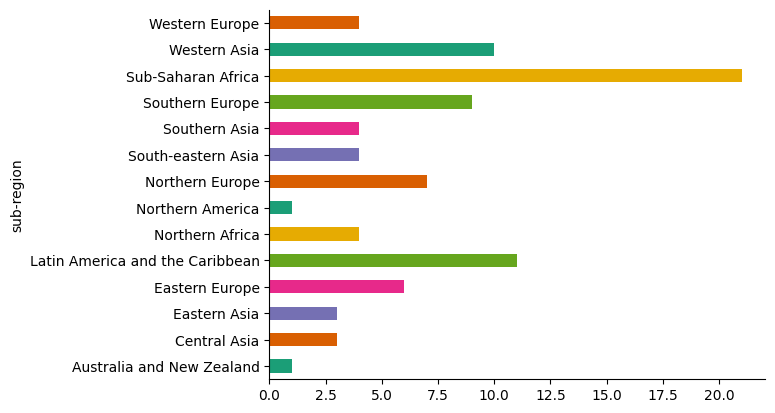

In [ ]:
X_train.groupby('sub-region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-76-a547e2d03a36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X_train, x='Social support', y='region', inner='stick', palette='Dark2')


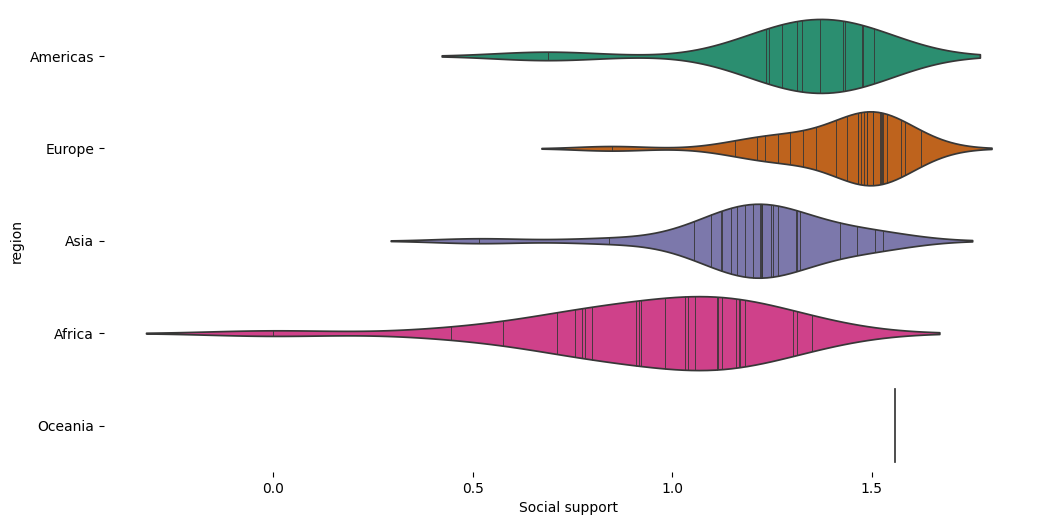

In [ ]:
figsize = (12, 1.2 * len(X_train['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X_train, x='Social support', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

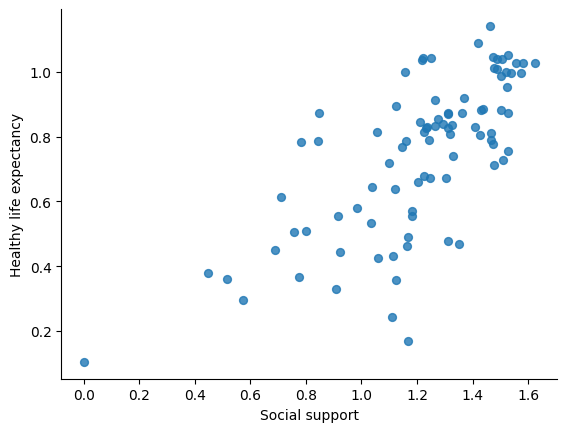

In [ ]:
# Your plotting code(s) here:
X_train.plot(kind='scatter', x='Social support', y='Healthy life expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

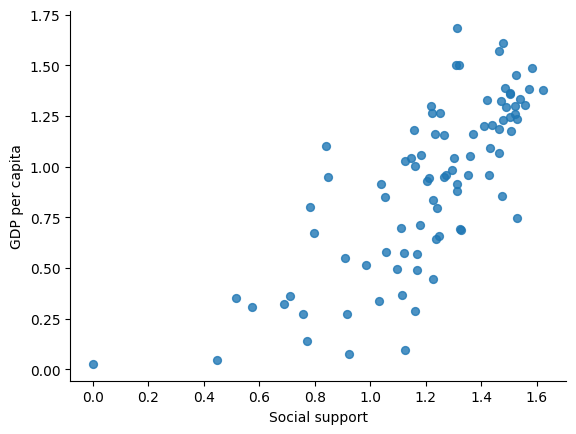

In [ ]:
X_train.plot(kind='scatter', x='Social support', y='GDP per capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(X_train.corr())

                               GDP per capita  Social support  \
GDP per capita                       1.000000        0.753791   
Social support                       0.753791        1.000000   
Healthy life expectancy              0.840467        0.709605   
Freedom to make life choices         0.458313        0.502305   
Generosity                          -0.069164       -0.015965   
Perceptions of corruption            0.349372        0.279549   
Terrorist_attacks                   -0.352544       -0.339582   
population                           0.018178       -0.043590   
population_below_poverty_line       -0.732533       -0.584165   
hdi                                  0.958917        0.793944   
life_expectancy                      0.832590        0.687287   
expected_years_of_schooling          0.835412        0.735139   
mean_years_of_schooling              0.828709        0.747244   
gni                                  0.806649        0.511369   

                        

<ipython-input-79-1ca6ff64c51a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X_train.corr())


Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here
# "population_below_poverty_line" is the only feature which have a missing value% of 10.98 in the entire X_train data frame. In order to utilize for training
# and prediction, it would need imputation later on.
# Both categorical and numerical features are meaningful for prediction. From categorical data(region&sub-region), we could observe that there's a skewness to
# data. Some regions(e.g.Africa) are more represented than others due to objective reason and possibly data collection. Moreover, for numerical data most
# follows a negatively skewed distribution.
# "Generosity","Terrorist_attacks","population" and "population_below_poverty_line" are four variables which have overwhelmingly negative correlations with
# rest of the numerical features.

## Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train[X_train.select_dtypes(include=['number']).columns]## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :
# Step 1. We dropped all the non-numerical features from X_train, and generated a list of the column name
# Step 2. For numerical value, we set the imputation stratey as constant and set the fill value as 0, meaning when there's a missing value, we will replace
# it with zero.The step then followed by standardize features and removing the mean and scaling to unit variance. This is a common requirement for many
# machine learning estimators. Since they might behave badly if the individual features do not more or less look like standard normally distributed data.
# Step 3. We then selected 'region' and 'sub-region' as two categorical variables of interests.
# Step 4. For categorical value, we set the imputation strategy as 'most frequent' meaning we would replace any missing value with the modal value. This step
# is then followed by encoding the categorical feature with One Hot Encoder, which generates creates a binary column for each category and returns a sparse
# matrix or dense array. This is neccessary for feeding categorical data to many scikit-learn estimators.
# Step 5. We then use column transformer to set up final preprocessor object,combining our previous numerical and categorical transformer, along with the features.
# Step 6. We finally fit the preprocessor object.


In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer : These four builds in progression neccessarily.  "Preprocessor" object are an instance of a preprocessing class or transformer in a
# machine learning library. These objects are used to apply various transformations to our data during the preprocessing step. "Preprocess" object in this
# context refer to the collective "preprocessor" objects defined in the previous steps. The "preprocessor" function is a custom function we define to handle
# specific transformations on the data, which could be later fit with other dataframe as well. The final returned "preprocessed_data" is neccessarily the end
# product of transformed X_train data that's fitful for machine learning.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 33)

## Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5, random_state=2)## Define a Random Forest Model here, fit it, and score it
model.fit(preprocessor(X_train),y_train)
print("Accuracy on training set: {:.3f}".format(model.score(preprocessor(X_train), y_train)))

# Your cell should have a score between 0-1 as output

Accuracy on training set: 0.932


## Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, random_state=0)## Make a new model with changed parameters to improve the score
model_2.fit(preprocessor(X_train),y_train)
print("Accuracy on training set: {:.3f}".format(model_2.score(preprocessor(X_train), y_train)))

Accuracy on training set: 1.000


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer : I increased the "n_estimators"-number of trees to generate for model. Possibly because with the increase of number of trees,
# overall variance has also been reduced. It also helps better generalization, as a Random Forest with more trees is likely to capture more
# complex patterns and relationships in the data.

Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer: There's definitely worth making more changes.  There are other parameters which I haven't deal with in previous models. Instead of manually
# changing the parameter one by one, we can aso use

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

rf_classifier = RandomForestClassifier()

# Use np.arange to create a sequence of numbers for each parameter's space you think should be searched
param_grid = {
    'n_estimators': np.arange(10, 110, 10),
    'max_depth': [None] + list(np.arange(10, 31, 5)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

# Read GridSearchCV docs and create an object with RandomForestClassifier as the model
gridmodel = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

#use model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.500
best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


# Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count= preprocessor(X_test).shape[1]#count features in input data

keras_model = Sequential()## Define a Neural Network Model with 5 layers 128->64->64->32->(?)

#Use Softmax activation in last layer. How many neurons should there be in the last layer?
keras_model.add(Dense(128, activation='relu', input_shape=(feature_count,)))  # Assuming input_dim is the input dimension
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(5, activation='softmax'))

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
history = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer: 'relu' was used in the middle layers, due to its ability of introduing non-linearity to the model. Softmax is used in the output layer
# for multi-class classification to convert raw scores into class probabilities. Therefore, for categorical classification tasks, leaving the out most
# layer as 'softmax' would probability distributions well.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:
# Overall, it seems reasonable to train for 300 epochs. There's no obvious plateaus for performance on validation nor earlt stopping.
# Training more could lead to overfitting, sacrificing potential performance on new test sets.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer: The choice of loss='categorical_crossentropy' indicates that the model is being trained for a multi-class classification problem where
# the target variable is one-hot encoded and each sample belongs to one of the multiple classes. The choice of optimizer='sgd' refers to
# Stochastic Gradient Descent, an optimization algorithm. SGD updates the model parameters based on the gradient of the loss function with respect to
# the parameters. The current configuration works fine, but we definitely could try to use different optimizers.

Can you try getting the model's training history out and plotting the curves?

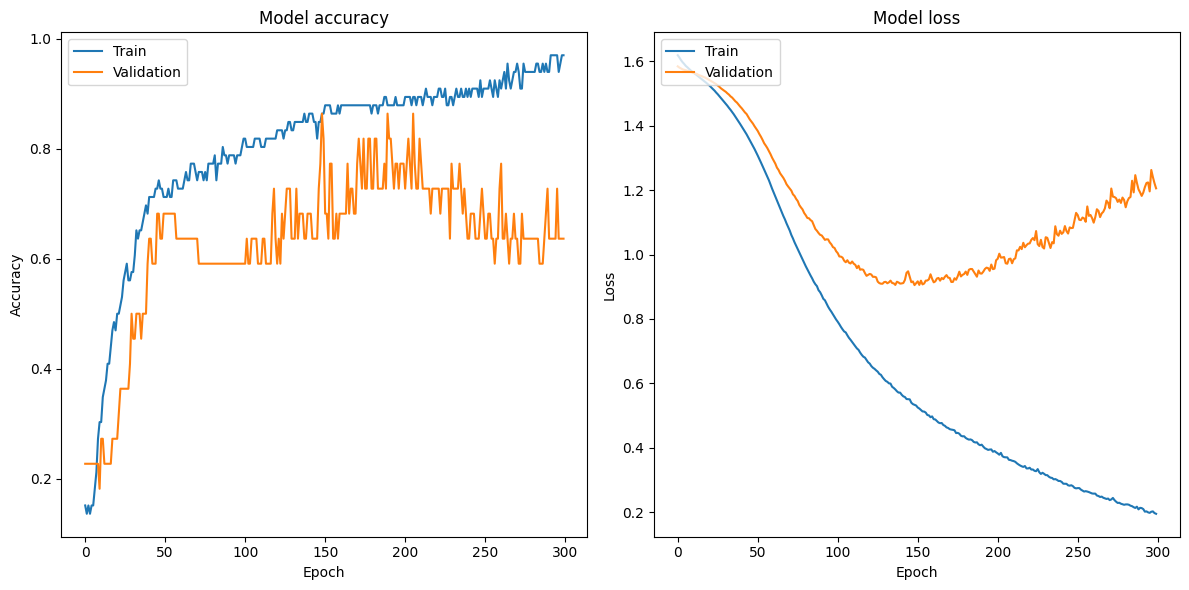

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()